# IMPORTING LIBRARIES

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Getting Data

In [91]:
df = pd.read_csv("C:\\Users\\91888\\OneDrive\\Desktop\\PROJECTS\\ilpd+indian+liver+patient+dataset\\Indian Liver Patient Dataset (ILPD).csv")

In [92]:
column_names= ['age','gender','TB','DB','Alkphos','sgpt','sgot','TP','ALB','ag ratio','Target']
df.columns=column_names

In [93]:
df.head()

,age,gender,TB,DB,Alkphos,sgpt,sgot,TP,ALB,ag ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [94]:
df.tail()

,age,gender,TB,DB,Alkphos,sgpt,sgot,TP,ALB,ag ratio,Target
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
581,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [95]:
df['gender'].value_counts()

Male      441
Female    141
Name: gender, dtype: int64

## Analysing the Data

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       582 non-null    int64  
 1   gender    582 non-null    object 
 2   TB        582 non-null    float64
 3   DB        582 non-null    float64
 4   Alkphos   582 non-null    int64  
 5   sgpt      582 non-null    int64  
 6   sgot      582 non-null    int64  
 7   TP        582 non-null    float64
 8   ALB       582 non-null    float64
 9   ag ratio  578 non-null    float64
 10  Target    582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [97]:
cor = df.corr()

In [98]:
df.describe()

,age,TB,DB,Alkphos,sgpt,sgot,TP,ALB,ag ratio,Target
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [99]:
df.isnull().sum()

age         0
gender      0
TB          0
DB          0
Alkphos     0
sgpt        0
sgot        0
TP          0
ALB         0
ag ratio    4
Target      0
dtype: int64

In [100]:
df.dropna(subset = ['ag ratio'],inplace = True)

In [101]:
df.drop(columns = ['ALB','DB'],inplace = True)
df.head()

,age,gender,TB,Alkphos,sgpt,sgot,TP,ag ratio,Target
0,62,Male,10.9,699,64,100,7.5,0.74,1
1,62,Male,7.3,490,60,68,7.0,0.89,1
2,58,Male,1.0,182,14,20,6.8,1.00,1
3,72,Male,3.9,195,27,59,7.3,0.40,1
4,46,Male,1.8,208,19,14,7.6,1.30,1


In [102]:
df.replace({'Male':0,'Female':1},inplace =True)
df.head()

,age,gender,TB,Alkphos,sgpt,sgot,TP,ag ratio,Target
0,62,0,10.9,699,64,100,7.5,0.74,1
1,62,0,7.3,490,60,68,7.0,0.89,1
2,58,0,1.0,182,14,20,6.8,1.00,1
3,72,0,3.9,195,27,59,7.3,0.40,1
4,46,0,1.8,208,19,14,7.6,1.30,1


In [103]:
# 1.TB - Total Bilirubin
# 2. DB - Direct Bilirubin
# 3.Alkphos -Alkaline Phosphotase
# 4. Sgpt - Alamine Aminotransferase
# 5. sgot - Aspartate Aminotransferase
# 6. TP - Total Protiens
# 7.ALB - Albumin
#8.A/G Ratio - Albumin and Globulin Ratio

# Visualization of Data

<AxesSubplot:>

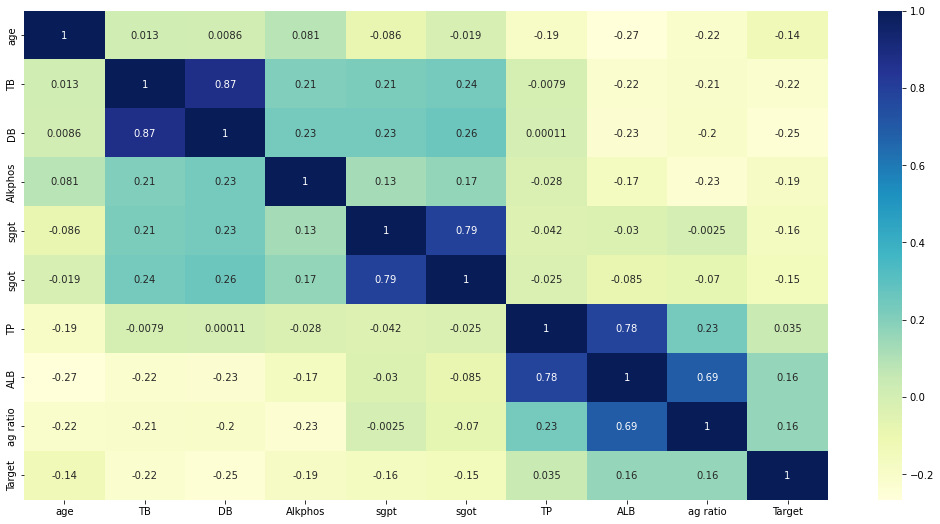

In [104]:
plt.figure(figsize=(18,9))
sns.heatmap(cor,cmap= 'YlGnBu',annot = True)

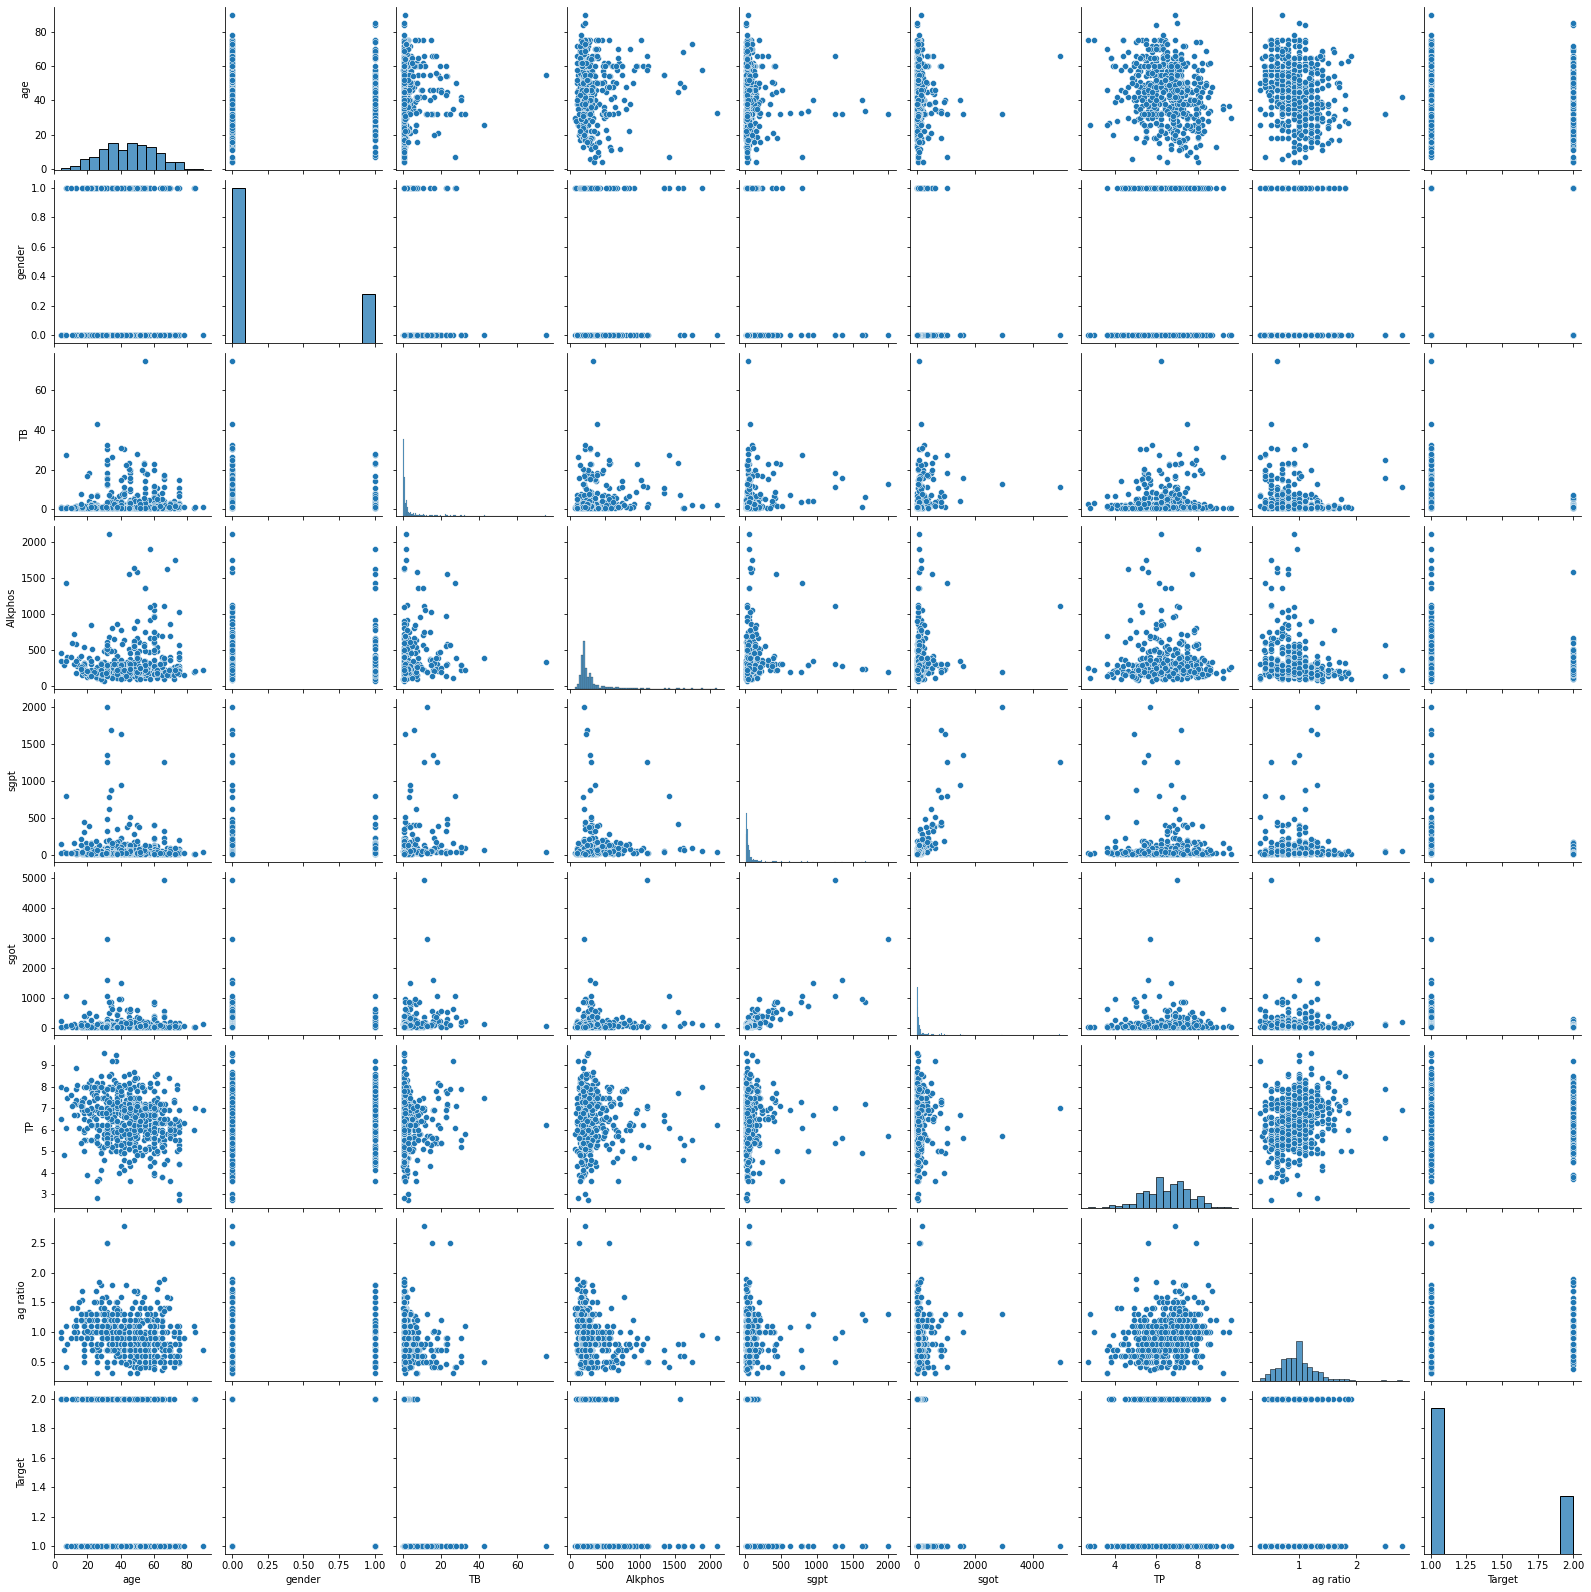

In [105]:
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='age', ylabel='ag ratio'>

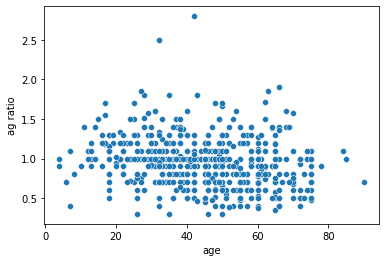

In [106]:
sns.scatterplot(df['age'],df['ag ratio'])

<AxesSubplot:xlabel='TP', ylabel='ag ratio'>

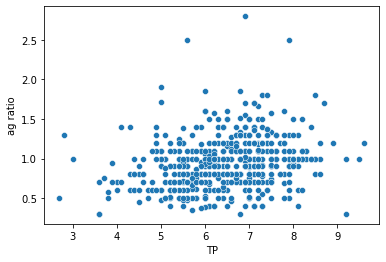

In [107]:
sns.scatterplot(df['TP'],df['ag ratio'])

<AxesSubplot:xlabel='age', ylabel='TP'>

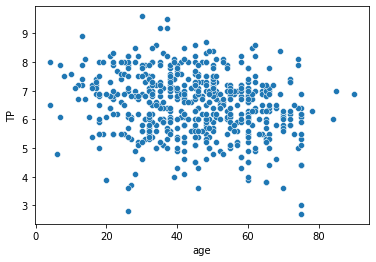

In [108]:
sns.scatterplot(df['age'],df['TP'])

## Splitting Data 

In [109]:
X = df.iloc[:,:-1]

In [110]:
len(X)

578

In [111]:
y=df.iloc[:,-1]

In [112]:
len(y)

578

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state= 42)

In [115]:
len(X_train)

404

In [116]:
len(X_test)

174

In [117]:
len(y_train)

404

In [118]:
len(y_test)

174

# Standardization 

In [119]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [120]:
scale.fit_transform(X_train)

array([[ 0.2121845 , -0.56591646,  0.33749757, ...,  0.23805218,
        -0.02199344,  0.12793842],
       [-2.50133473, -0.56591646, -0.42329581, ..., -0.24823722,
         1.35202993,  0.12793842],
       [-0.40452441, -0.56591646, -0.31196019, ..., -0.03314768,
        -0.48000124,  0.12793842],
       ...,
       [-0.71287887, -0.56591646, -0.25629239, ..., -0.2856441 ,
         1.35202993,  0.12793842],
       [ 0.27385539,  1.76704527, -0.44185175, ..., -0.29187858,
         0.43601435,  1.6191999 ],
       [ 0.64388074,  1.76704527, -0.44185175, ..., -0.28252686,
        -0.38839968,  0.72444302]])

In [121]:
scale.transform(X_test)

array([[-0.71287887, -0.56591646, -0.31196019, ...,  0.08219019,
         0.89402214,  0.12793842],
       [-0.28118263, -0.56591646, -0.47896362, ..., -0.25758894,
        -0.48000124,  0.42619072],
       [ 0.52053896,  1.76704527, -0.44185175, ..., -0.17654071,
         0.16120967,  0.6051421 ],
       ...,
       [-1.14457511, -0.56591646, -0.23773645, ..., -0.29499582,
         1.53523305,  0.12793842],
       [ 0.58220985, -0.56591646, -0.44185175, ..., -0.29187858,
        -0.93800903,  0.0086375 ],
       [-1.57627135,  1.76704527, -0.46040768, ...,  0.88332082,
        -0.93800903,  0.72444302]])

## Implementing Model

In [122]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [123]:
lg.fit(X_train,y_train)

LogisticRegression()

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
X_train_pred = lg.predict(X_train)
train_acc = accuracy_score(y_train,X_train_pred)
print(train_acc)

0.7326732673267327


In [126]:
y_test_pred = lg.predict(X_test)
test_acc = accuracy_score(y_test,y_test_pred)
print(test_acc)

0.7298850574712644


In [128]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[119,   8],
       [ 39,   8]], dtype=int64)